### MODEL FOR PERCLOS NEURAL NET

In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras import backend as K

### GETTING Data

In [2]:
dfAwake_train = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostrain_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_train = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostrain_DData.txt', header=None, delim_whitespace=True)

# dfInd_train = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostrain_IData.txt', header=None, delim_whitespace=True)
dfAwake_test = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostest_AData.txt', header=None, delim_whitespace=True)
dfDrowsy_test = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostest_DData.txt', header=None, delim_whitespace=True)
# dfInd_test = pd.read_csv('Data/Perclos Data with Indeterminates (90%)/perclostest_IData.txt', header=None, delim_whitespace=True)

# dfAwake_test1 = pd.read_csv('Data/Validation/validation_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_test1 = pd.read_csv('Data/Validation/validation_DData.txt', header=None, delim_whitespace=True)
# dfAwake_test2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_AData.txt', header=None, delim_whitespace=True)
# dfDrowsy_test2 = pd.read_csv('Data/Data for 2nd Level Classification/testing2_DData.txt', header=None, delim_whitespace=True)


In [ ]:
# Awake_frames = [dfAwake_test1, dfAwake_test2]
# Drowsy_frames = [dfDrowsy_test1, dfDrowsy_test2]
# dfAwake_test = pd.concat(Awake_frames)
# dfDrowsy_test = pd.concat(Drowsy_frames)

### Printing Retrieved Data informations

In [3]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfInd_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)
# print(dfInd_test.shape)

(2910600, 1)
(2430000, 1)
(810000, 1)
(1080000, 1)


### Dropping Not Needed Columns Keeping PERCLOS

In [ ]:
# dfAwake_train = dfAwake_train.drop(dfAwake_train.iloc[:,0:14],axis = 1)
# dfDrowsy_train = dfDrowsy_train.drop(dfDrowsy_train.iloc[:,0:14],axis = 1)
# dfAwake_test = dfAwake_test.drop(dfAwake_test.iloc[:,0:14],axis = 1)
# dfDrowsy_test = dfDrowsy_test.drop(dfDrowsy_test.iloc[:,0:14],axis = 1)

In [4]:
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)

(2910600, 1)
(2430000, 1)
(810000, 1)
(1080000, 1)


### RESHAPING DATA

In [5]:
dfAwake_train = dfAwake_train.to_numpy()
dfDrowsy_train = dfDrowsy_train.to_numpy()
# dfInd_train = dfInd_train.to_numpy()
dfAwake_train = dfAwake_train.reshape(3234,900,1)
dfDrowsy_train = dfDrowsy_train.reshape(2700,900,1)
# dfInd_train = dfInd_train.reshape(1266,900,1)
dfAwake_test = dfAwake_test.to_numpy()
dfDrowsy_test = dfDrowsy_test.to_numpy()
# dfInd_test = dfInd_test.to_numpy()
dfAwake_test = dfAwake_test.reshape(900,900,1)
dfDrowsy_test = dfDrowsy_test.reshape(1200,900,1)
# dfInd_test = dfInd_test.reshape(1500,900,1)
print(dfAwake_train.shape)
print(dfDrowsy_train.shape)
# print(dfInd_train.shape)
print(dfAwake_test.shape)
print(dfDrowsy_test.shape)
# print(dfInd_test.shape)
# print(dfAwake.head)
# print(dfDrowsy.head)

(3234, 900, 1)
(2700, 900, 1)


NameError: name 'dfInd_train' is not defined

### CREATING LABELS

In [6]:
dfAwake_trainLabels = np.zeros(3234)
print(dfAwake_trainLabels.shape)
dfDrowsy_trainLabels = np.ones(2700)
print(dfDrowsy_trainLabels.shape)
# dfInd_trainLabels = np.full(1266,2)
# print(dfInd_trainLabels.shape)
dfAwake_testLabels = np.zeros(900)
print(dfAwake_testLabels.shape)
dfDrowsy_testLabels = np.ones(1200)
print(dfDrowsy_testLabels.shape)
# dfInd_testLabels = np.full(1500,2)
# print(dfInd_testLabels.shape)

(3234,)
(2700,)
(900,)
(1200,)


In [7]:
print(dfAwake_trainLabels)
print(dfDrowsy_trainLabels)
# print(dfInd_trainLabels)
print(dfAwake_testLabels)
print(dfDrowsy_testLabels)
# print(dfInd_testLabels)

[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.

### Combining Awake Data and Drowsy Data

In [8]:
# dftrain = np.concatenate((dfAwake_train, dfDrowsy_train, dfInd_train))
# dftrainlabels =np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels, dfInd_trainLabels))
dftrain = np.concatenate((dfAwake_train, dfDrowsy_train))
dftrainlabels =np.concatenate((dfAwake_trainLabels, dfDrowsy_trainLabels))
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(5934, 900, 1)
(5934,)
[[[ 3.666667]
  [ 3.666667]
  [ 3.666667]
  ...
  [ 3.      ]
  [ 3.      ]
  [ 3.      ]]

 [[ 3.666667]
  [ 3.666667]
  [ 3.666667]
  ...
  [ 3.      ]
  [ 3.      ]
  [ 3.      ]]

 [[ 3.666667]
  [ 3.666667]
  [ 3.666667]
  ...
  [ 3.      ]
  [ 3.      ]
  [ 3.      ]]

 ...

 [[14.333333]
  [14.444445]
  [14.666666]
  ...
  [12.666666]
  [12.222222]
  [12.222222]]

 [[14.444445]
  [14.666666]
  [14.666666]
  ...
  [12.222222]
  [12.222222]
  [12.555556]]

 [[14.666666]
  [14.666666]
  [14.444445]
  ...
  [12.222222]
  [12.555556]
  [12.111111]]]
[0. 0. 0. ... 1. 1. 1.]


### SHUFFLING DATA

In [9]:
idx = np.random.permutation(len(dftrainlabels))
print(idx)

[2845  168 1664 ... 2978 4539 3449]


In [10]:
dftrain=dftrain[idx]
dftrainlabels=dftrainlabels[idx]

In [11]:
print(dftrain.shape)
print(dftrainlabels.shape)
print(dftrain)
print(dftrainlabels)

(5934, 900, 1)
(5934,)
[[[2.888889]
  [2.888889]
  [2.888889]
  ...
  [5.444444]
  [5.444444]
  [5.444444]]

 [[4.777778]
  [4.777778]
  [4.444445]
  ...
  [7.555555]
  [7.444444]
  [7.333333]]

 [[1.444444]
  [1.444444]
  [1.444444]
  ...
  [3.888889]
  [3.888889]
  [3.888889]]

 ...

 [[6.777778]
  [6.777778]
  [6.777778]
  ...
  [8.111111]
  [8.111111]
  [8.111111]]

 [[3.      ]
  [3.      ]
  [3.      ]
  ...
  [0.888889]
  [0.888889]
  [0.888889]]

 [[8.111111]
  [8.111111]
  [8.111111]
  ...
  [6.      ]
  [6.      ]
  [6.      ]]]
[0. 0. 0. ... 0. 1. 1.]


In [12]:
# dftest = np.concatenate((dfAwake_test, dfDrowsy_test,dfInd_test))
# dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels,dfInd_testLabels))
dftest = np.concatenate((dfAwake_test, dfDrowsy_test))
dftestlabels =np.concatenate((dfAwake_testLabels, dfDrowsy_testLabels))
print(dftest.shape)
print(dftestlabels.shape)
print(dftest)
print(dftestlabels)

(2100, 900, 1)
(2100,)
[[[0.777778]
  [0.777778]
  [0.777778]
  ...
  [1.666667]
  [1.666667]
  [1.666667]]

 [[0.777778]
  [0.777778]
  [0.777778]
  ...
  [1.666667]
  [1.666667]
  [1.666667]]

 [[0.777778]
  [0.777778]
  [0.777778]
  ...
  [1.666667]
  [1.666667]
  [1.666667]]

 ...

 [[5.444444]
  [5.444444]
  [5.444444]
  ...
  [6.666667]
  [6.666667]
  [6.666667]]

 [[5.444444]
  [5.444444]
  [5.666667]
  ...
  [6.666667]
  [6.666667]
  [6.666667]]

 [[5.444444]
  [5.666667]
  [5.777778]
  ...
  [6.666667]
  [6.666667]
  [6.666667]]]
[0. 0. 0. ... 1. 1. 1.]


In [13]:
print(dftest.shape)
print(dftestlabels.shape)
print(dftrain.shape)
print(dftrainlabels.shape)

(2100, 900, 1)
(2100,)
(5934, 900, 1)
(5934,)


### Set input and output dimensions

In [14]:
input_shape = 900
# num_classes = 3
num_classes = 2
# dftrain = dftrain.reshape(dftrain.shape[0],input_shape)
print('dftrain shape:', dftrain.shape)
print('input_shape:', input_shape)

dftrain shape: (5934, 900, 1)
input_shape: 900


In [ ]:
dftrain = dftrain.astype('float32')
dftrainlabels = dftrainlabels.astype('float32')

In [ ]:
dftrainlabels_hot = np_utils.to_categorical(dftrainlabels,num_classes)
print('New dfttrainlabels shape: ', dftrainlabels_hot)

In [ ]:
print('New dfttrainlabels shape: ', dftrainlabels_hot.shape)
print(dftrainlabels)

In [ ]:
print(dftrain.shape)
print(dftrainlabels.shape)

#### Evaluating Training Data

In [ ]:
model = keras.models.load_model("best_model(perclosv2).h5")

test_loss, test_acc = model.evaluate(dftrain, dftrainlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

### Building the MODEL

In [ ]:
# model_m = Sequential()
# # Remark: since coreml cannot accept vector shapes of complex shape like
# # [80,3] this workaround is used in order to reshape the vector internally
# # prior feeding it into the network
# model_m.add(Reshape((900, 1), input_shape=(input_shape,)))
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition
# model_m.add(Dense(100, activation='relu'))
# # model_m.add(BatchNormalization()) # V2 addition 
# model_m.add(Flatten())
# model_m.add(Dense(num_classes, activation='softmax'))
# print(model_m.summary())

In [ ]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    # conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    # conv2 = keras.layers.BatchNormalization()(conv2)
    # conv2 = keras.layers.ReLU()(conv2)

    # conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    # conv3 = keras.layers.BatchNormalization()(conv3)
    # conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv1)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=dftrain.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

### FITTING Deep neural network Model in KERAS

In [ ]:
# callbacks_list = [
#     keras.callbacks.ModelCheckpoint(
#         filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
#         monitor='val_loss', save_best_only=True),
#     keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)
# ]



# model_m.compile(loss='categorical_crossentropy',
#                 optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # Hyper-parameters
# BATCH_SIZE = 400 # V3 changed to 2160
# EPOCHS = 50


# # Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
# # v1
# history = model_m.fit(dftrain,
#                       dftrainlabels_hot,
#                       batch_size=BATCH_SIZE,
#                       epochs=EPOCHS,
#                       callbacks=callbacks_list,
#                       validation_split=0.2,
#                       verbose=1)

# # # v1 completing all epochs
# # history = model_m.fit(dftrain,
# #                       dftrainlabels_hot,
# #                       batch_size=BATCH_SIZE,
# #                       epochs=EPOCHS,
# #                       validation_split=0.2,
# #                       verbose=1)

# # v3
# # history = model_m.fit(dftrain,
# #                       dftrainlabels_hot,
# #                       batch_size=BATCH_SIZE,
# #                       epochs=EPOCHS,
# #                       shuffle=True,
# #                       validation_split=0.2,
# #                       verbose=1)


In [ ]:
epochs = 250
batch_size = 45

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model(perclos).h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=25, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
# model.compile(
#     optimizer="adam",
#     loss="categorical_crossentropy",
#     metrics=["accuracy"],
# )
history = model.fit(
    dftrain,
    dftrainlabels,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
# plt.figure(figsize=(6, 4))
# plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
# plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
# plt.plot(history.history['loss'], 'r--', label='Loss of training data')
# plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
# plt.title('Model Accuracy and Loss')
# plt.ylabel('Accuracy and Loss')
# plt.xlabel('Training Epoch')
# plt.ylim(0)
# plt.legend()
# plt.show()

metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val","loss","val_loss"], loc="best")
# plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

# Print confusion matrix for training data
y_pred_train = model.predict(dftrain)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(dftrainlabels, max_y_pred_train))

### Checking against Testing Data

In [15]:

# Set input_shape / reshape for Keras
# dftest = dftest.reshape(dftest.shape[0], input_shape)

dftest = dftest.astype('float32')
dftestlabels = dftestlabels.astype('float32')

dftestlabels_hot = np_utils.to_categorical(dftestlabels, num_classes)


In [16]:
print('New dfttrainlabels shape: ', dftestlabels_hot)
print('New dfttrainlabels shape: ', dftestlabels.shape)
print('New dfttrainlabels shape: ', dftestlabels)

New dfttrainlabels shape:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
New dfttrainlabels shape:  (2100,)
New dfttrainlabels shape:  [0. 0. 0. ... 1. 1. 1.]


In [ ]:
# score = model_m.evaluate(dftest, dftestlabels_hot, verbose=1)

# print('\nAccuracy on test data: %0.2f' % score[1])
# print('\nLoss on test data: %0.2f' % score[0])

In [17]:
# LABELS = ['Awake','Drowsy','Indeterminate']
LABELS = ['Awake','Drowsy']

In [ ]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

In [18]:
model = keras.models.load_model("best_model(perclosv2).h5")

test_loss, test_acc = model.evaluate(dftest, dftestlabels,verbose=1)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

66/66 [==============================] - 0s 2ms/step - loss: 0.2726 - sparse_categorical_accuracy: 0.8571
Test accuracy 0.8571428656578064
Test loss 0.272570937871933


In [ ]:
# # Print confusion matrix for training data
# y_pred_train = model.predict(dftest)
# # Take the class with the highest probability from the train predictions
# max_y_pred_train = np.argmax(y_pred_train, axis=1)
# print(classification_report(dftestlabels, max_y_pred_train))

66/66 [==============================] - 0s 3ms/step


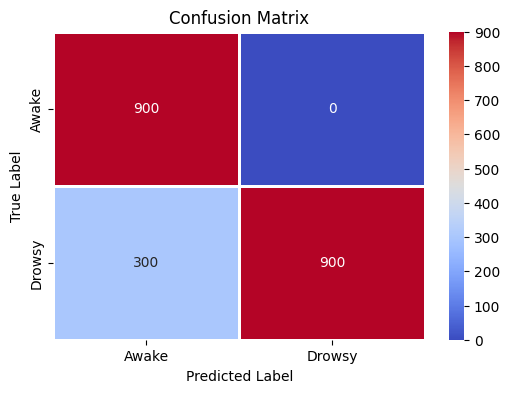

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       900
           1       1.00      0.75      0.86      1200

    accuracy                           0.86      2100
   macro avg       0.88      0.88      0.86      2100
weighted avg       0.89      0.86      0.86      2100



In [19]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(dftest)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(dftestlabels_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

### ROC and AUC

66/66 [==============================] - 0s 3ms/step
[[0.94784445 0.05215554]
 [0.94777983 0.0522201 ]
 [0.94771516 0.0522848 ]
 ...
 [0.40596882 0.5940312 ]
 [0.40599507 0.5940049 ]
 [0.40416533 0.5958347 ]]


C:\Users\admin\AppData\Local\Temp\ipykernel_15896\3476021706.py:34: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


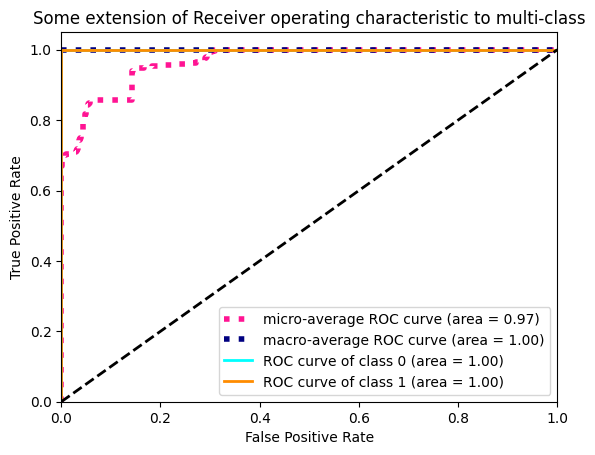

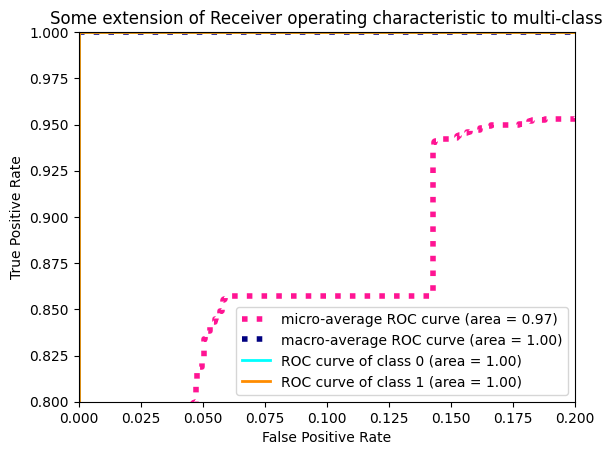

In [20]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_scores = model.predict(dftest)
print(y_scores)

lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(dftestlabels_hot[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(dftestlabels_hot.ravel(), y_scores.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [21]:
y_scores

array([[0.94784445, 0.05215554],
       [0.94777983, 0.0522201 ],
       [0.94771516, 0.0522848 ],
       ...,
       [0.40596882, 0.5940312 ],
       [0.40599507, 0.5940049 ],
       [0.40416533, 0.5958347 ]], dtype=float32)

In [ ]:
# model = keras.models.load_model("best_model.h5")
# print(model.summary())